In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Agenda

1. Tips and tricks in matplotlib
2. subplots
3. New graphs : 3D graphs
4. Heatmap
5. Pandas plot function

#### Colored scatter plots

In [2]:
iris = pd.read_csv('data/iris.csv')

In [3]:
iris.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
119,120,6.0,2.2,5.0,1.5,Iris-virginica
63,64,6.1,2.9,4.7,1.4,Iris-versicolor
2,3,4.7,3.2,1.3,0.2,Iris-setosa
35,36,5.0,3.2,1.2,0.2,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa


In [4]:
iris['Species'] = iris['Species'].replace({'Iris-virginica':0,'Iris-versicolor':1,'Iris-setosa':2})

/var/folders/2n/v2zy3n991d94k9g19pvh8k5m0000gn/T/ipykernel_74550/1737169071.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris['Species'] = iris['Species'].replace({'Iris-virginica':0,'Iris-versicolor':1,'Iris-setosa':2})


In [5]:
iris.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
16,17,5.4,3.9,1.3,0.4,2
24,25,4.8,3.4,1.9,0.2,2
20,21,5.4,3.4,1.7,0.2,2
63,64,6.1,2.9,4.7,1.4,1
64,65,5.6,2.9,3.6,1.3,1


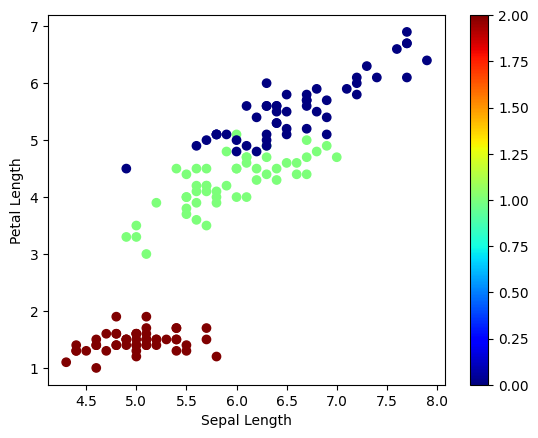

In [7]:
plt.scatter(iris['SepalLengthCm'],iris['PetalLengthCm'],c=iris['Species'],cmap='jet')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.colorbar()

#### Plot size

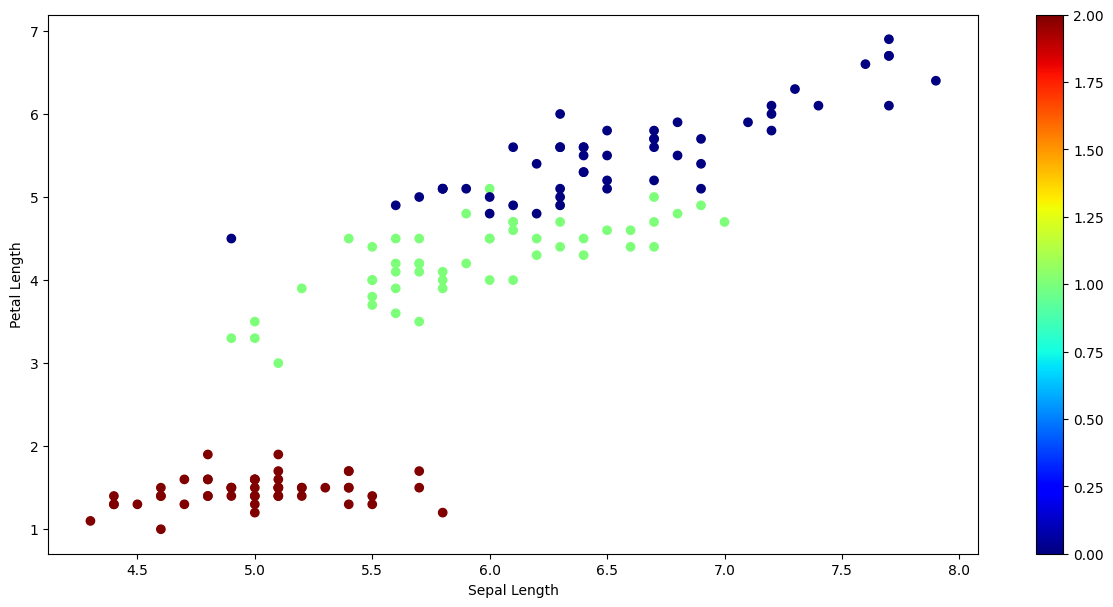

In [8]:
plt.figure(figsize=(15,7))

plt.scatter(iris['SepalLengthCm'],iris['PetalLengthCm'],c=iris['Species'],cmap='jet')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.colorbar()

#### Annotations

In [9]:
batters = pd.read_csv('data/batter.csv')

In [10]:
batters.shape

(605, 4)

In [12]:
sample_df = batters.head(100).sample(25,random_state=5)

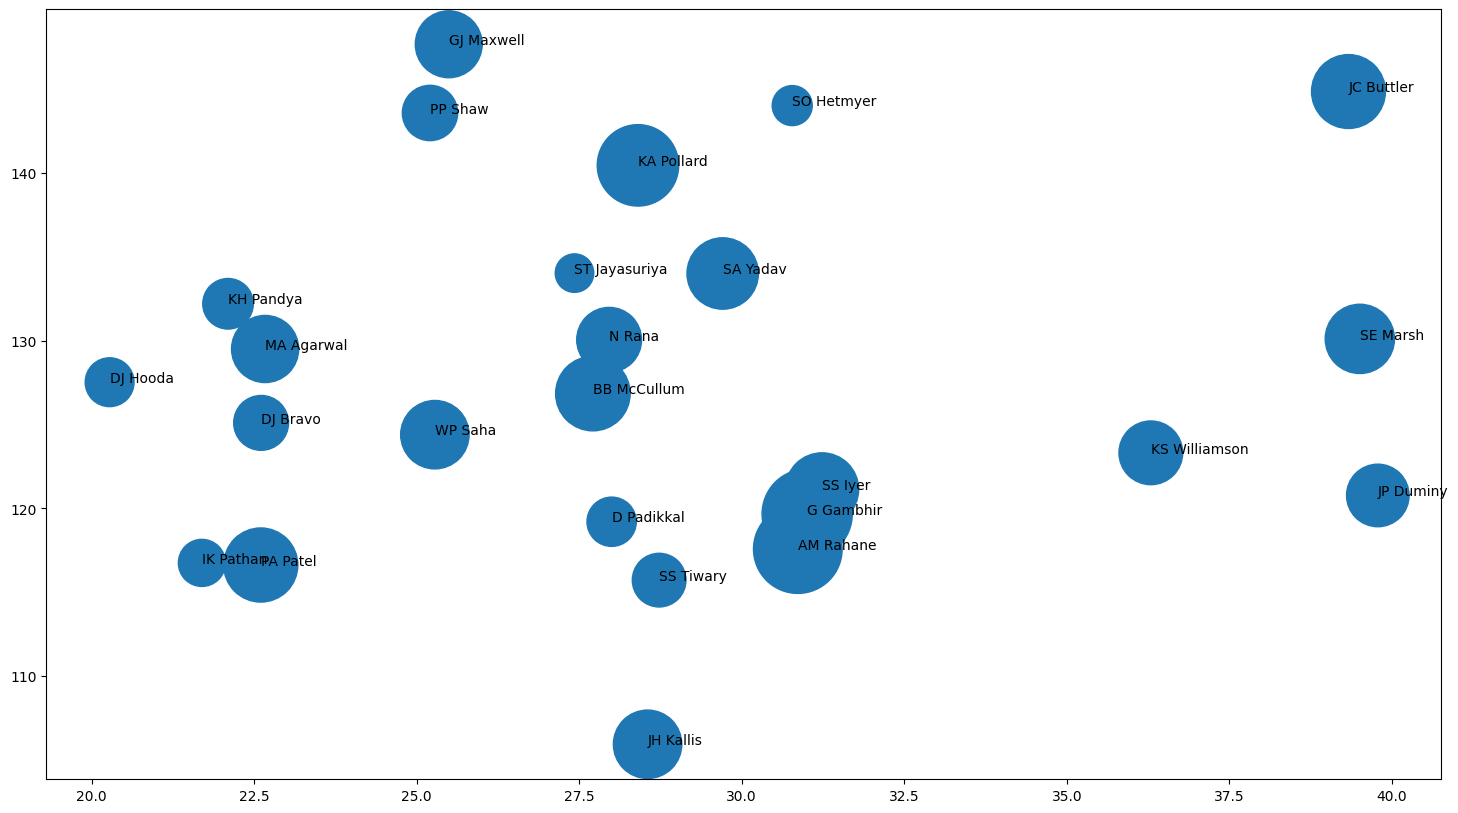

In [13]:
plt.figure(figsize=(18,10))
plt.scatter(sample_df['avg'],sample_df['strike_rate'],s=sample_df['runs'])

for i in range(sample_df.shape[0]):
    plt.text(sample_df['avg'].values[i],sample_df['strike_rate'].values[i],sample_df['batter'].values[i])


Text(4, 8, 'Point 4')

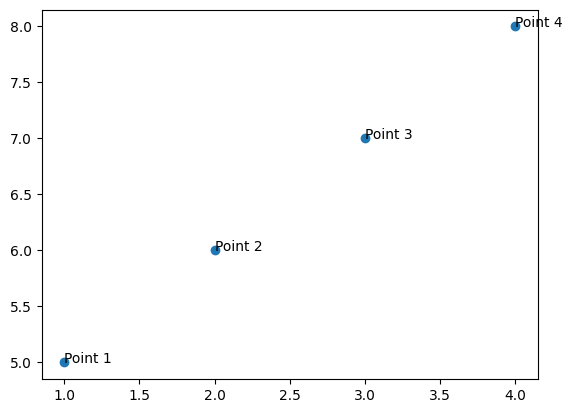

In [14]:
x = [1,2,3,4]
y = [5,6,7,8]

plt.scatter(x,y)

plt.text(1,5,'Point 1')
plt.text(2,6,'Point 2')
plt.text(3,7,'Point 3')
plt.text(4,8,'Point 4')

#### Horizontal and Vertical lines

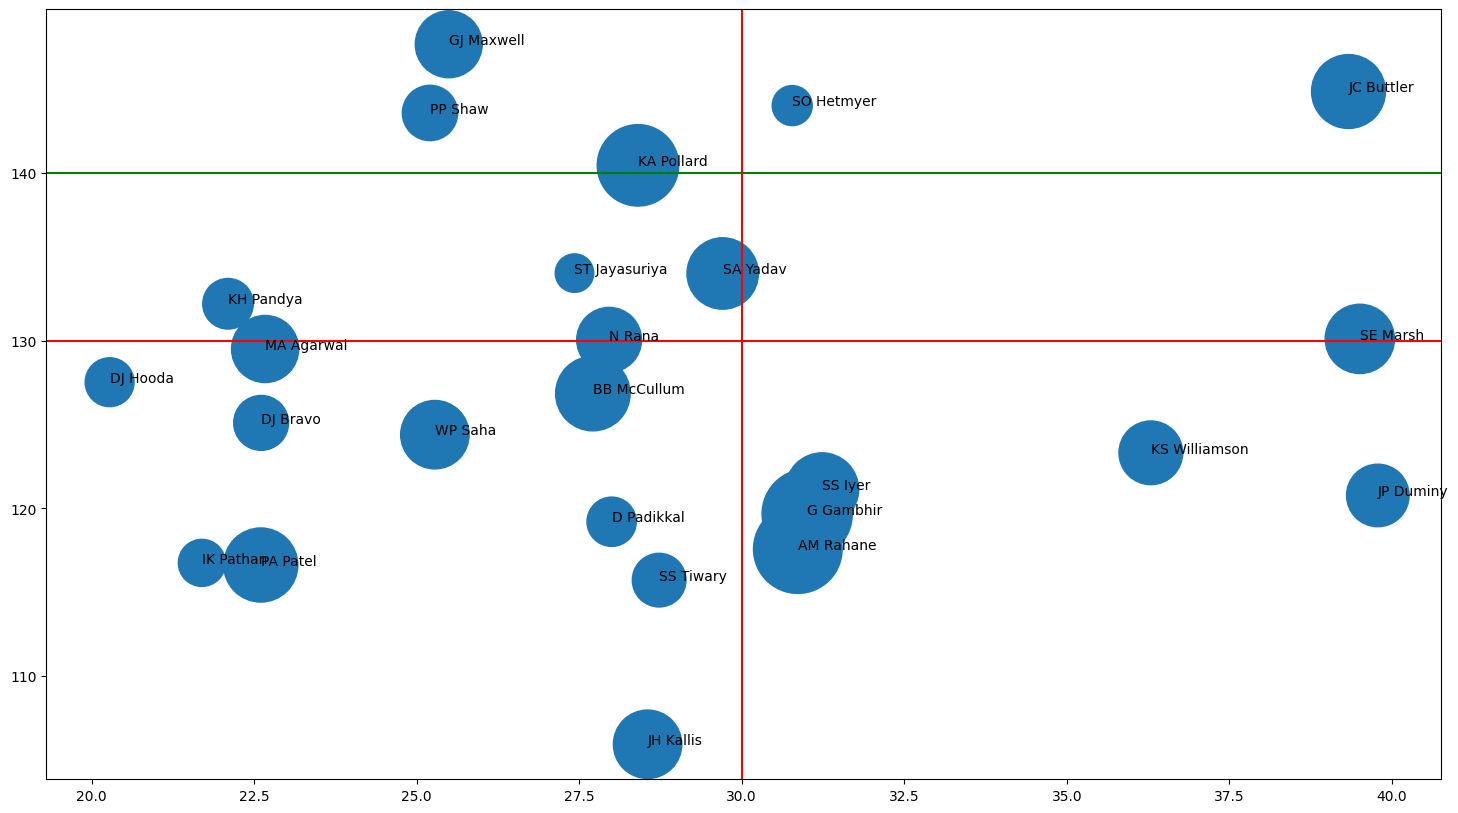

In [15]:
plt.figure(figsize=(18,10))
plt.scatter(sample_df['avg'],sample_df['strike_rate'],s=sample_df['runs'])

plt.axhline(130,color='red')
plt.axhline(140,color='green')
plt.axvline(30,color='red')

for i in range(sample_df.shape[0]):
    plt.text(sample_df['avg'].values[i],sample_df['strike_rate'].values[i],sample_df['batter'].values[i])

#### subplots

In [16]:
batters.head()

,batter,runs,avg,strike_rate
0,V Kohli,6634,36.251366,125.977972
1,S Dhawan,6244,34.882682,122.840842
2,DA Warner,5883,41.429577,136.401577
3,RG Sharma,5881,30.314433,126.964594
4,SK Raina,5536,32.374269,132.535312


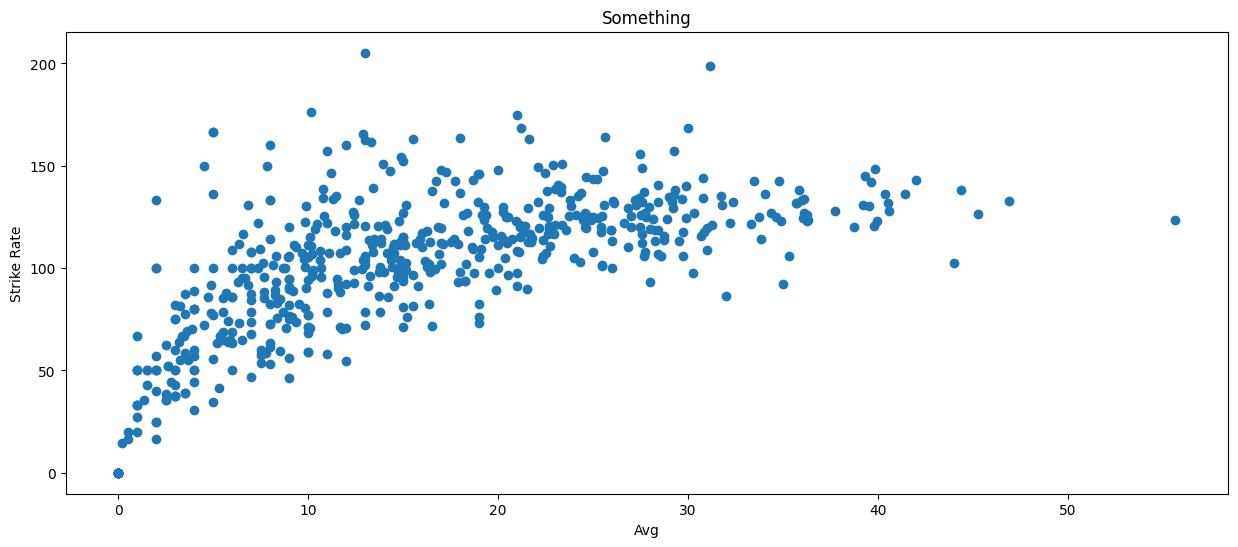

In [17]:
plt.figure(figsize=(15,6))

plt.scatter(batters['avg'],batters['strike_rate'])
plt.title('Something')
plt.xlabel('Avg')
plt.ylabel('Strike Rate')

plt.show()

Text(0, 0.5, 'Strike Rate')

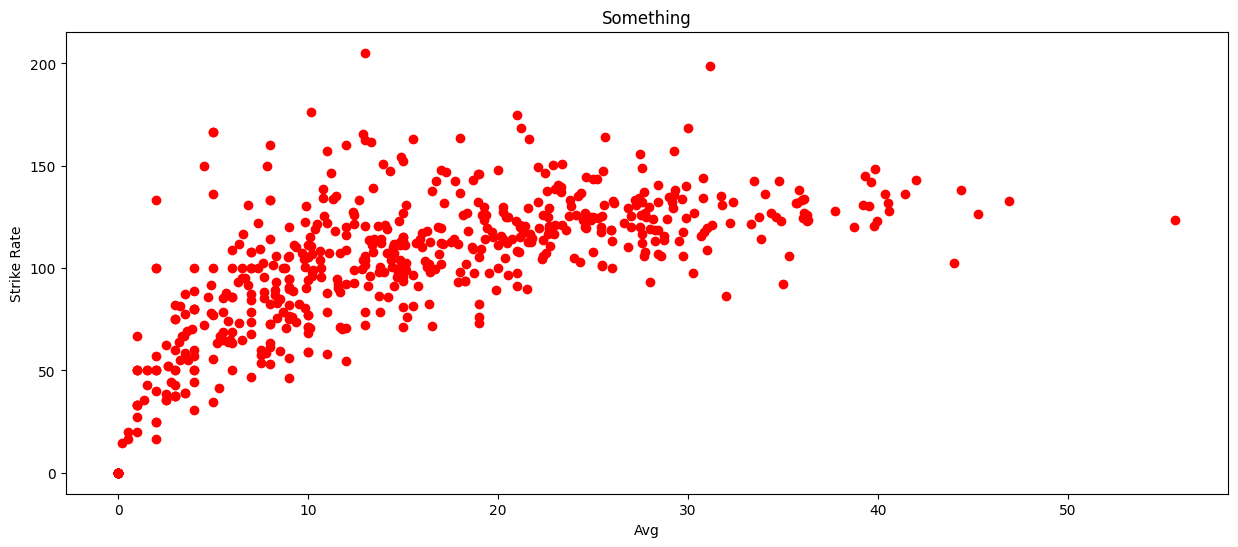

In [20]:
fig,ax = plt.subplots(figsize=(15,6))

ax.scatter(batters['avg'],batters['strike_rate'],color='red')
ax.set_title('Something')
ax.set_xlabel('Avg')
ax.set_ylabel('Strike Rate')

Text(0.5, 0, 'Avg')

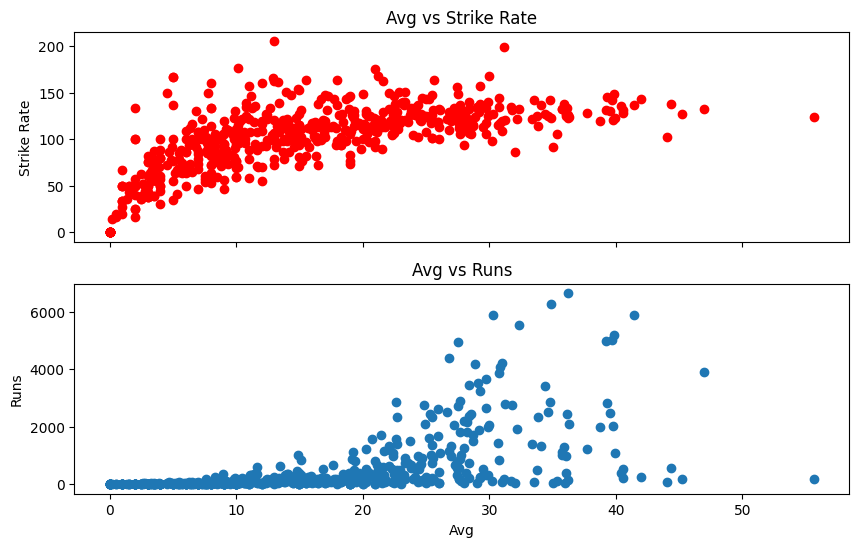

In [21]:
fig,ax = plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(10,6))

ax[0].scatter(batters['avg'],batters['strike_rate'],color='red')
ax[1].scatter(batters['avg'],batters['runs'])

ax[0].set_title('Avg vs Strike Rate')
ax[0].set_ylabel('Strike Rate')

ax[1].set_title('Avg vs Runs')
ax[1].set_ylabel('Runs')
ax[1].set_xlabel('Avg')

(array([499.,  40.,  19.,  19.,   9.,   6.,   4.,   4.,   3.,   2.]),
 array([   0. ,  663.4, 1326.8, 1990.2, 2653.6, 3317. , 3980.4, 4643.8,
        5307.2, 5970.6, 6634. ]),
 <BarContainer object of 10 artists>)

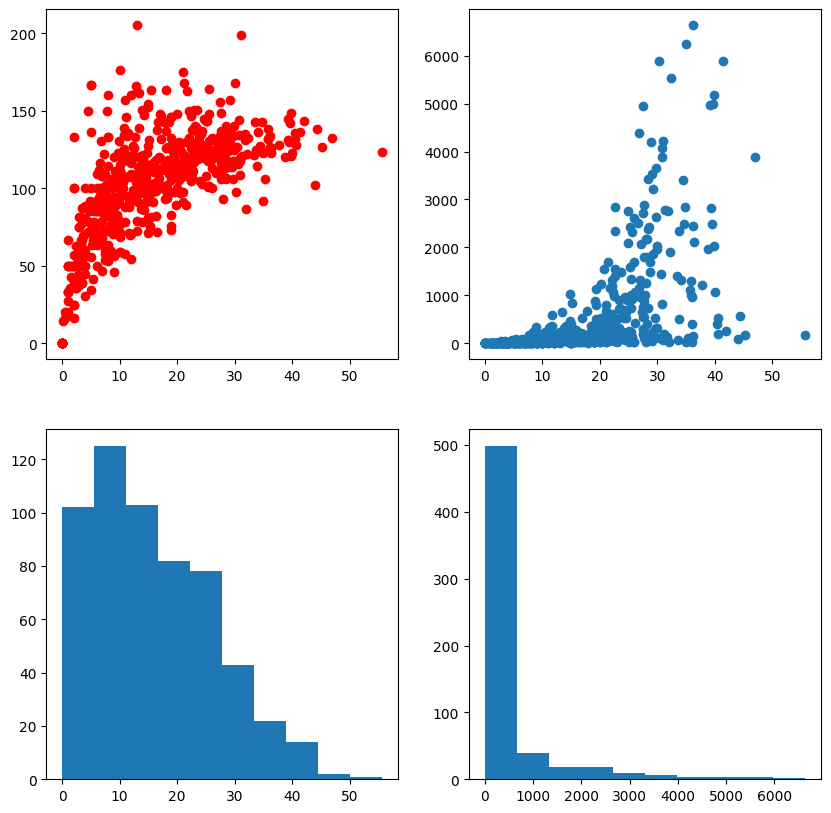

In [23]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(10,10))

ax[0,0].scatter(batters['avg'],batters['strike_rate'],color='red')
ax[0,1].scatter(batters['avg'],batters['runs'])
ax[1,0].hist(batters['avg'])
ax[1,1].hist(batters['runs'])

#### 3D Scatter plots